# Predictions on growth of reported death by Novel Coronavirus (2019-nCoV)
                      By Bohan updated on July 19, 2020  
## Goal: Compare deaths within Canada with other countries.

## Method: 
### Draw logtithmic graph similar to slide 6 of Ontario's projections released on April 3, 2020
(URL: https://www.cbc.ca/news/canada/toronto/ontario-covid-projections-1.5519575)

## Data: 
Publically available source from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE  
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series


## Notes: 
### This is NOT official projection.
### This notebook can be used for other provinces or countries by changing names in the code.

  

In [1]:
import numpy as np;  # useful for many scientific computing in Python
import pandas as pd; # primary data structure library
import scipy as sp; # for statistical tests
import matplotlib.pyplot as plt; # for plotting
from matplotlib.ticker import ScalarFormatter # for fomat log axis

In [2]:
# data from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'); # import file
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,957,971,994,1010,1012,1048,1094,1113,1147,1164
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,83,85,89,93,95,97,101,104,107,111
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,988,996,1004,1011,1018,1028,1040,1052,1057,1068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22,23,23,26,26,26,27,28,29,29


In [3]:
# I will use data from the date when reached 5 deaths
# define a function to do it
def find5(s):
    # s: pandas series containing number of death cases
    
    for i in range(len(s.to_numpy())):
        if s.to_numpy()[i] >= 5:
            s2 = s[i:];
            break   
    return s2

In [4]:
# US example
US_sum = df[df['Country/Region'] == 'US'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
US_sum = find5(US_sum);

# Spain example
Spain_sum = df[df['Country/Region'] == 'Spain'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
Spain_sum = find5(Spain_sum);

# Germany example
Germany_sum = df[df['Country/Region'] == 'Germany'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
Germany_sum = find5(Germany_sum);

# France example
France_sum = df[df['Country/Region'] == 'France'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
France_sum = find5(France_sum);

# United Kingdom example
UK_sum = df[df['Country/Region'] == 'United Kingdom'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
UK_sum = find5(UK_sum);

# Italy example
Italy_sum = df[df['Country/Region'] == 'Italy'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
Italy_sum = find5(Italy_sum);

In [5]:
# Canada
Canada = df[df['Country/Region'] == 'Canada'];
# find sum for the entire country
Canada_sum = Canada.iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
Canada_sum = find5(Canada_sum);
# remove provinces did not reach 5 deaths
Canada = Canada[Canada.iloc[:,-1] > 5]
Canada

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,161,161,160,160,161,163,163,165,167,167
36,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,186,187,187,187,189,189,189,189,189,189
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
41,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,63,63,63,63,63,63,63,63,63,63
42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,0,0,...,2750,2760,2760,2764,2767,2769,2778,2784,2790,2791
44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,5609,5612,5620,5627,5628,5633,5636,5646,5647,5654
45,Saskatchewan,Canada,52.9399,-106.4509,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,15,15


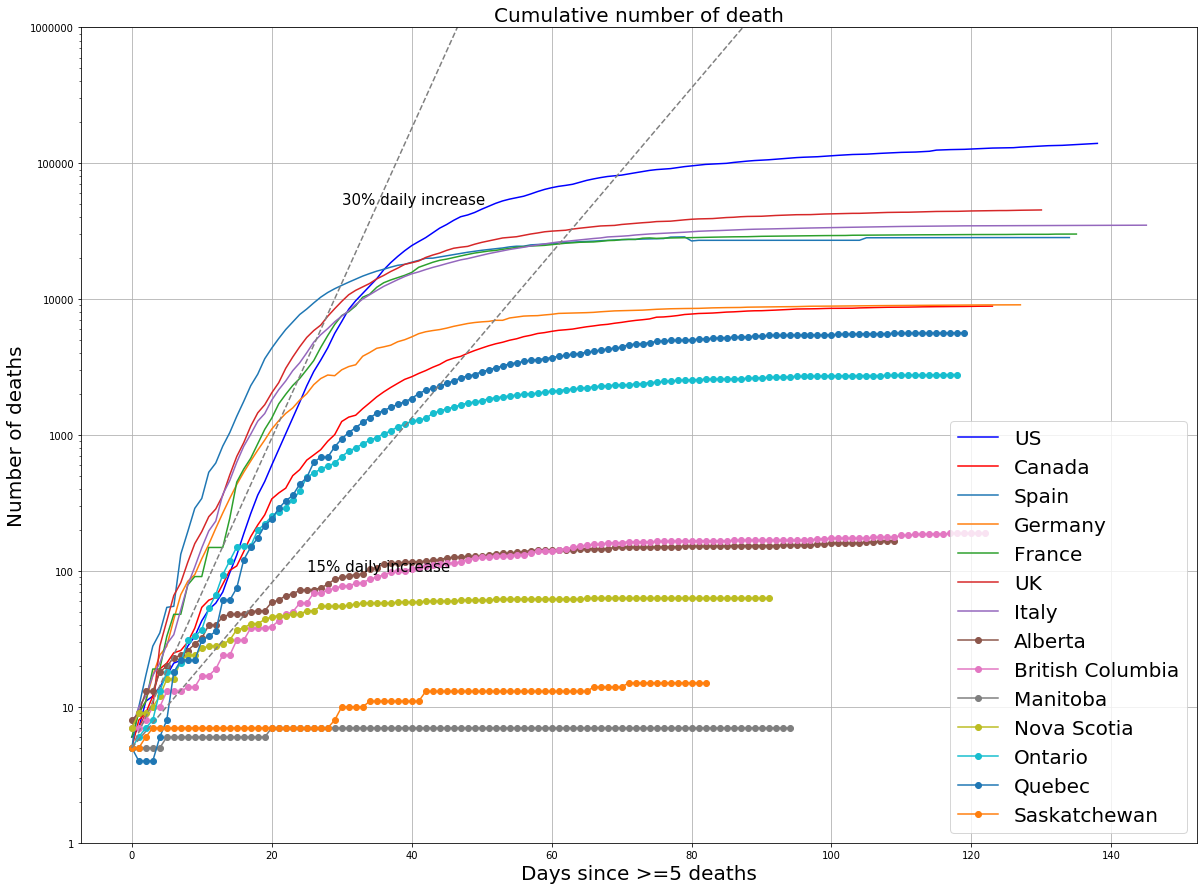

In [6]:
fig = plt.figure(figsize=(20,15));
ax = fig.add_subplot(111);

# plot counties
plt.semilogy(US_sum.to_numpy(),'b', label='US');
plt.semilogy(Canada_sum.to_numpy(),'r', label='Canada');
plt.semilogy(Spain_sum.to_numpy(), label='Spain');
plt.semilogy(Germany_sum.to_numpy(), label='Germany');
plt.semilogy(France_sum.to_numpy(), label='France');
plt.semilogy(UK_sum.to_numpy(), label='UK');
plt.semilogy(Italy_sum.to_numpy(), label='Italy');

# plot for each Province in a loop
for i in range(len(Canada.index)):
    po = find5(Canada.iloc[i,4:]);
    plt.semilogy(po.to_numpy(),'-o', label=Canada.iloc[i,0]);
    
# plot guide lines
v = np.arange(0,len(US_sum.index));
plt.plot(5*(1.+.15)**v, color='grey', linestyle='dashed');
plt.plot(5*(1.+.3)**v, color='grey', linestyle='dashed');

ax.text(30, 50000, r'30% daily increase', fontsize=15);
ax.text(25, 100, r'15% daily increase', fontsize=15);
    
plt.legend(fontsize=20);
plt.ylabel('Number of deaths', fontsize=20);
plt.title('Cumulative number of death', fontsize=20);
plt.xlabel('Days since >=5 deaths', fontsize=20);
ax.yaxis.set_major_formatter(ScalarFormatter());
plt.ylim([1,10**6]);
plt.grid(True);
plt.show();